# Lesson 9 Notebook
Hanna Born

#### Question 1
The tips.csv dataset contains data on tips collected from a restaurant. 
    a.	Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.
    b.	Repeat part a, but broken down by time. 

In [27]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [28]:
# part a

tips = Table.read_table('tips.csv')
tips.select('tip','sex').group('sex', np.mean) # find mean

sex,tip mean
Female,2.83345
Male,3.08962


C:\Users\C20Hanna.Born\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


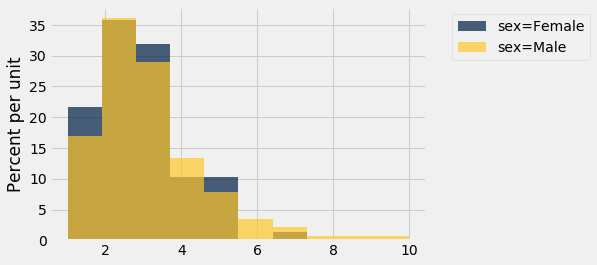

In [29]:
tips.select('tip','sex').hist('tip',group='sex') # make histogram

In [30]:
# part b
tips.select('tip','time').group('time', np.mean)

time,tip mean
Dinner,3.10267
Lunch,2.72809


C:\Users\C20Hanna.Born\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


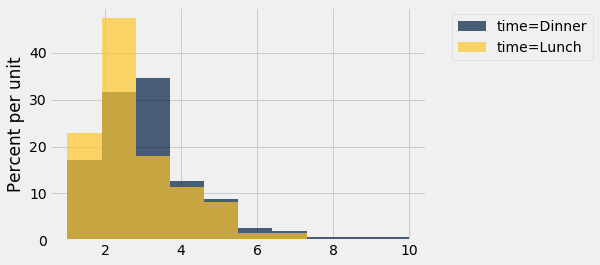

In [7]:
tips.select('tip','time').hist('tip',group='time') # make histogram

#### Question 2
Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [31]:
def weekday_to_num(input):
    """inputs string for day of week and returns number"""
    return input.replace("Mon","1").replace("Tues","2").replace("Wed","3").replace("Thur","4").replace("Fri","5").replace("Sat","6").replace("Sun","7")
    
# test
print(weekday_to_num("Sun"))

7


#### Question 3
Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num. 

In [32]:
new_tips = tips.with_column("weekday_num",tips.apply(weekday_to_num,"day"))
new_tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


#### Question 4
Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of this function will be the predicted tip amount. 

In [40]:
def est_tip(input_bill):
    """predicts tip amount based on the value of the bill, using nearby values"""
    close_bills = tips.where("total_bill", are.between(input_bill-.5,input_bill+.5))
    return close_bills.column("tip").mean()

est_tip(20)

3.0345454545454547

#### Question 5
Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount. 

In [41]:
# part 1 - apply new function and include result in new column
new_tips_2 = tips.with_column("predicted_tip", tips.apply(est_tip,"total_bill"))
new_tips_2

total_bill,tip,sex,smoker,day,time,size,predicted_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.99769
10.34,1.66,Male,No,Sun,Dinner,3,1.74067
21.01,3.5,Male,No,Sun,Dinner,3,3.42
23.68,3.31,Male,No,Sun,Dinner,2,3.33833
24.59,3.61,Female,No,Sun,Dinner,4,3.45333
25.29,4.71,Male,No,Sun,Dinner,4,4.34833
8.77,2,Male,No,Sun,Dinner,2,1.63
26.88,3.12,Male,No,Sun,Dinner,4,3.27125
15.04,1.96,Male,No,Sun,Dinner,2,2.43
14.78,3.23,Male,No,Sun,Dinner,2,2.61111


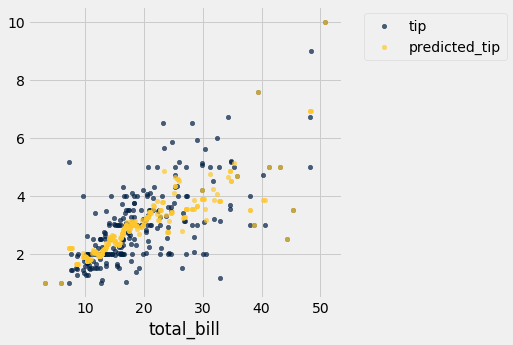

In [42]:
# part 2 - scatterplot showing predicted tip and actual tip amount
new_tips_2.scatter("total_bill",["tip","predicted_tip"])